# CatBoost Model

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Set-Matplotlib-Options" data-toc-modified-id="Set-Matplotlib-Options-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Set Matplotlib Options</a></span></li><li><span><a href="#Load-Dataframes-From-Pickle" data-toc-modified-id="Load-Dataframes-From-Pickle-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Dataframes From Pickle</a></span></li><li><span><a href="#Create-Train/Test--Split" data-toc-modified-id="Create-Train/Test--Split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create Train/Test  Split</a></span></li><li><span><a href="#Define-CatBoost-Params" data-toc-modified-id="Define-CatBoost-Params-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Define CatBoost Params</a></span></li><li><span><a href="#Columns-to-Drop" data-toc-modified-id="Columns-to-Drop-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Columns to Drop</a></span></li><li><span><a href="#Some-Feature-Engineering" data-toc-modified-id="Some-Feature-Engineering-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Some Feature Engineering</a></span></li><li><span><a href="#Run-CatBoost-Model" data-toc-modified-id="Run-CatBoost-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Run CatBoost Model</a></span><ul class="toc-item"><li><span><a href="#Tope-50-Important-Features" data-toc-modified-id="Tope-50-Important-Features-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Tope 50 Important Features</a></span></li></ul></li><li><span><a href="#Save-Predictions" data-toc-modified-id="Save-Predictions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save Predictions</a></span></li></ul></div>

## Load Libraries

In [1]:
import os
import sys
import gc

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.fe_modeling2 import *

# Set Pandas Options

In [2]:
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000
pd.options.display.max_colwidth = 1000

## Set Matplotlib Options

In [3]:
# Set a few plotting defaults
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 12

## Load Dataframes From Pickle

In [4]:
%%time
X = pd.read_pickle('../data/train_reduced.pkl')
X_test = pd.read_pickle('../data/test_reduced.pkl')

sample_submission = pd.read_csv('../data/sample_submission.csv', index_col='TransactionID')

y = X[TARGET]
X = X.drop(TARGET, axis=1)
        
print(f'X.shape : {X.shape}, X_test.shape : {X_test.shape}')

X.shape : (590540, 434), X_test.shape : (506691, 434)
Wall time: 6.71 s


## Create Train/Test  Split

In [5]:
def train_val_split_by_time(X, y, test_size=0.2):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, shuffle=False)
    
    print(f'train.shape: {X_train.shape}, val.shape: {X_val.shape}')
    
    return X_train, y_train, X_val, y_val

In [6]:
X_train, y_train, X_val, y_val = train_val_split_by_time(X, y)

train.shape: (472432, 434), val.shape: (118108, 434)


## Define CatBoost Params

In [7]:
cat_params = {
    'n_estimators':100,
    'learning_rate': 0.07,
    'eval_metric':'AUC',
    'loss_function':'Logloss',
    'random_seed':SEED,
    'metric_period':500,
    'od_wait':500,
    'task_type':'GPU',
    'depth': 8,
    #'colsample_bylevel':0.7,
} 

## Columns to Drop 

In [8]:
cols_to_drop = [
    'D5_DT_W_std_score',
    'ProductCD_TransactionAmt_DT_W',
    'D4_DT_D_std_score',
    'D15_DT_D_std_score',
    'D3_DT_W_std_score',
    'D11_DT_W_std_score',
    'card3_card5_DT_W_week_day_dist',
    'card5_DT_W_week_day_dist',
    'D10_DT_D_std_score',
    'card3_card5_DT_D',
    'ProductCD_cents_DT_D',
    'D4_DT_W_std_score',
    'D15_DT_W_std_score',
    'uid_DT_D',
    'card3_DT_W_week_day_dist',
    'D10_DT_W_std_score',
    'D8_DT_D_std_score',
    'card3_card5_DT_W',
    'ProductCD_cents_DT_W',
    'uid_DT_W',
    'D8_DT_W_std_score'
]

## Some Feature Engineering

In [9]:
X_train_fe, X_val_fe, feature_cols1, category_cols1 = fe1(X_train, X_val)

Rare data card1 5134
No intersection in Train card1 20399
Intersection in Train card1 452033
####################
Rare data ProductCD_card1 10509
No intersection in Train ProductCD_card1 33115
Intersection in Train ProductCD_card1 439317
####################
Rare data card1_addr1 21640
No intersection in Train card1_addr1 57867
Intersection in Train card1_addr1 414565
####################
Rare data TransactionAmt_dist2 18260
No intersection in Train TransactionAmt_dist2 49343
Intersection in Train TransactionAmt_dist2 423089
####################
No intersection in Train card2 6102
Intersection in Train card2 466330
####################
No intersection in Train card3 146
Intersection in Train card3 472286
####################
No intersection in Train card4 0
Intersection in Train card4 472432
####################
No intersection in Train card5 7339
Intersection in Train card5 465093
####################
No intersection in Train card6 45
Intersection in Train card6 472387
###############

uid_aggregation: card5_id_14_mean
uid_aggregation: card5_id_14_std
uid_aggregation: uid_id_14_mean
uid_aggregation: uid_id_14_std
uid_aggregation: card3_card5_id_14_mean
uid_aggregation: card3_card5_id_14_std
uid_aggregation: uid_V258_mean
uid_aggregation: uid_V258_std
uid_aggregation: card3_card5_V258_mean
uid_aggregation: card3_card5_V258_std
uid_aggregation: uid_V306_mean
uid_aggregation: uid_V306_std
uid_aggregation: card3_card5_V306_mean
uid_aggregation: card3_card5_V306_std
uid_aggregation: uid_V307_mean
uid_aggregation: uid_V307_std
uid_aggregation: card3_card5_V307_mean
uid_aggregation: card3_card5_V307_std
uid_aggregation: uid_V308_mean
uid_aggregation: uid_V308_std
uid_aggregation: card3_card5_V308_mean
uid_aggregation: card3_card5_V308_std
uid_aggregation: uid_V294_mean
uid_aggregation: uid_V294_std
uid_aggregation: card3_card5_V294_mean
uid_aggregation: card3_card5_V294_std
timeblock frequency encoding: ProductCD_TransactionAmt_DT_D
timeblock frequency encoding: ProductCD_T

processing nan group agg for: ['V143', 'V144', 'V145', 'V150', 'V151', 'V152', 'V159', 'V160', 'V164', 'V165', 'V166']
processing nan group agg for: ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216']
processing nan group agg for: ['V169', 'V170', 'V171', 'V174', 'V175', 'V180', 'V184', 'V185', 'V188', 'V189', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V208', 'V209', 'V210']
processing nan group agg for: ['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278']
processing nan group

Column: V321  | Dominator: 0.0
Column: V322  | Dominator: -999.0
Column: V323  | Dominator: -999.0
Column: V324  | Dominator: -999.0
Column: V325  | Dominator: -999.0
Column: V326  | Dominator: -999.0
Column: V327  | Dominator: -999.0
Column: V328  | Dominator: -999.0
Column: V329  | Dominator: -999.0
Column: V330  | Dominator: -999.0
Column: V331  | Dominator: -999.0
Column: V332  | Dominator: -999.0
Column: V333  | Dominator: -999.0
Column: V334  | Dominator: -999.0
Column: V335  | Dominator: -999.0
Column: V336  | Dominator: -999.0
Column: V337  | Dominator: -999.0
Column: V338  | Dominator: -999.0
Column: V339  | Dominator: -999.0
Column: id_03  | Dominator: -999.0
Column: id_04  | Dominator: -999.0
Column: id_07  | Dominator: -999.0
Column: id_08  | Dominator: -999.0
Column: id_09  | Dominator: -999.0
Column: id_10  | Dominator: -999.0
Column: id_14  | Dominator: -999.0
Column: id_18  | Dominator: -999.0
Column: id_21  | Dominator: -999.0
Column: id_22  | Dominator: -999.0
Column:

Column: nan_group_182  | Dominator: 0
Column: nan_group_187  | Dominator: 0
Column: nan_group_8310  | Dominator: 0
Column: nan_group_8325  | Dominator: 0
Column: nan_group_56771  | Dominator: 0
Column: nan_group_77261  | Dominator: 0
Column: nan_group_13160  | Dominator: 0
Column: nan_group_15575  | Dominator: 0
Column: nan_group_160  | Dominator: 0
Column: nan_group_573  | Dominator: 0
Duplicate card3_FE_FULL
Duplicate card3_TransactionAmt_mean
Duplicate card3_TransactionAmt_std
Duplicate card3_id_01_mean
Duplicate card3_id_01_std
Duplicate card3_id_02_mean
Duplicate card3_id_02_std
Duplicate card3_id_05_mean
Duplicate card3_id_05_std
Duplicate card3_id_06_mean
Duplicate card3_id_09_mean
Duplicate card3_id_09_std
Duplicate card3_id_14_mean
Duplicate card3_id_14_std
Duplicate card3_C1_mean
Duplicate card3_C1_std
Duplicate card3_C2_mean
Duplicate card3_C2_std
Duplicate card3_C3_mean
Duplicate card3_C3_std
Duplicate card3_C4_mean
Duplicate card3_C4_std
Duplicate card3_C5_mean
Duplicate c

## Run CatBoost Model

feature_columns len after discard features: 536
(472432, 536) (118108, 536)
0:	learn: 0.9059317	test: 0.8439906	best: 0.8439906 (0)	total: 213ms	remaining: 21.1s
99:	learn: 0.9718325	test: 0.9413978	best: 0.9414623 (98)	total: 23.1s	remaining: 0us
bestTest = 0.9414623082
bestIteration = 98
Shrink model to first 99 iterations.
seed: 42 , auc: 0.9414622886435322 , best_iteration: 98
0:	learn: 0.8969279	test: 0.8383822	best: 0.8383822 (0)	total: 258ms	remaining: 25.6s
99:	learn: 0.9717709	test: 0.9421010	best: 0.9421010 (99)	total: 28.3s	remaining: 0us
bestTest = 0.9421010315
bestIteration = 99
seed: 43 , auc: 0.9421010461116403 , best_iteration: 99
0:	learn: 0.9122502	test: 0.8477095	best: 0.8477095 (0)	total: 212ms	remaining: 21s
99:	learn: 0.9718583	test: 0.9412227	best: 0.9412574 (98)	total: 34.8s	remaining: 0us
bestTest = 0.9412573576
bestIteration = 98
Shrink model to first 99 iterations.
seed: 44 , auc: 0.9412573497844595 , best_iteration: 98
avg preds auc: 0.94200, avg auc: 0.9416

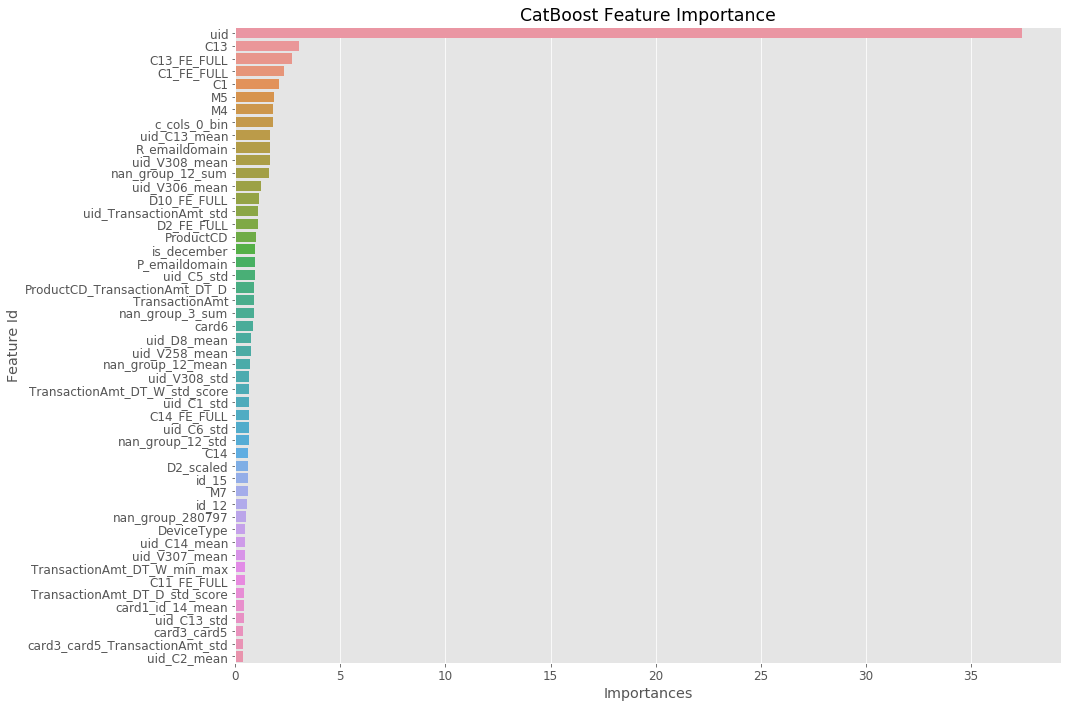

In [10]:
feature_columns = [col for col in feature_cols1 if col not in cols_to_drop]
print('feature_columns len after discard features:', len(feature_columns))
category_columns = [col for col in category_cols1 if col not in cols_to_drop]

best_iteration1, val_preds, fi_df = make_val_prediction(X_train_fe[feature_columns], y_train, X_val_fe[feature_columns],
                                                 y_val, cat_params=cat_params, category_cols=category_columns)

### Tope 50 Important Features

In [12]:
fi_df[:50]

,Feature Id,Importances
0,uid,37.425641
1,C13,3.036514
2,C13_FE_FULL,2.720076
3,C1_FE_FULL,2.322718
4,C1,2.071189
5,M5,1.830982
6,M4,1.810447
7,c_cols_0_bin,1.777398
8,uid_C13_mean,1.662432
9,R_emaildomain,1.650957


## Save Predictions

In [11]:
np.save('val_preds_cat.npy', val_preds)

In [ ]:
feature_cols = [col for col in X_train.columns]
print(len(feature_cols))
X_fe, X_test_fe, feature_cols, category_cols = fe1(X[feature_cols], X_test[feature_cols])

In [ ]:
print('feature_columns len:', len(feature_cols))
feature_columns = [col for col in feature_cols if col not in list_discarded]
print('feature_columns len after discard features:', len(feature_columns))
category_columns = [col for col in category_cols if col not in list_discarded]
print('category_columns len after discard features:', len(category_columns))

preds = make_test_prediction(X_fe[feature_columns], y, X_test_fe[feature_columns], best_iteration1, category_cols=category_columns)

In [ ]:
np.save('preds_cat.npy', preds)